# 1. 시나리오 이해

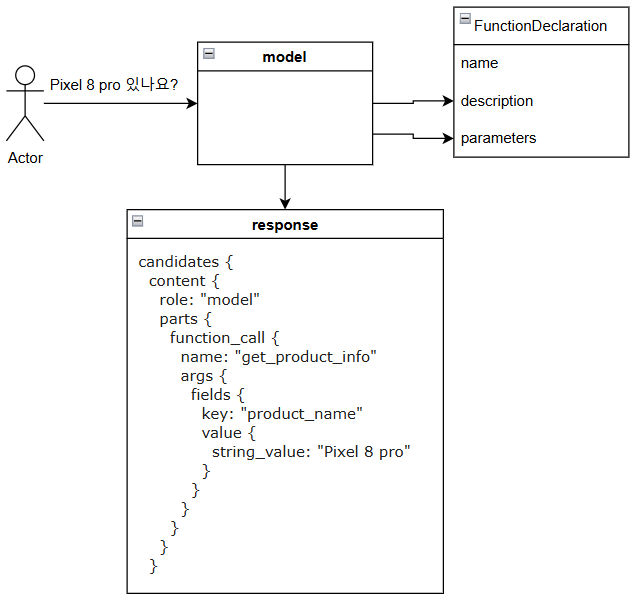

# 2. 환경설정

In [ ]:
!pip install --upgrade google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.73.0
    Uninstalling google-cloud-aiplatform-1.73.0:
      Successfully uninstalled google-cloud-aiplatform-1.73.0


In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

# 3. 초기화

In [1]:
import vertexai

PROJECT_ID=!gcloud config get-value project
PROJECT_ID=PROJECT_ID[0]
LOCATION = "us-east1"

vertexai.init(project=PROJECT_ID, location=LOCATION)

In [2]:
from vertexai.generative_models import (
    GenerativeModel,
    FunctionDeclaration,
    Tool,
    GenerationConfig,
)

# 4. 함수 생성 및 모델 연결

In [3]:
get_product_info = FunctionDeclaration(
    name="get_product_info",
    description="제품의 이름을 얻을 수 있다.",
    parameters={
        "type": "object",
        "properties":{
            "product_name": {"type": "string", "description": "제품 이름"}
        },
    },
)

In [4]:
single_tool=Tool(
    function_declarations=[get_product_info]
)

In [9]:
model = GenerativeModel(
    "gemini-1.5-pro",
    # generation_config=GenerationConfig(temperature=0),
    tools=[single_tool],
)
chat = model.start_chat()

# 5. 결과 확인

In [7]:
prompt="""
이 가게에 Pixel 8 pro 있나요?
"""

response = chat.send_message(prompt)
print(response)

candidates {
  content {
    role: "model"
    parts {
      function_call {
        name: "get_product_info"
        args {
          fields {
            key: "product_name"
            value {
              string_value: "Pixel 8 pro"
            }
          }
        }
      }
    }
  }
  avg_logprobs: -3.25856478108714e-05
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
    probability_score: 0.168945312
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.111328125
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
    probability_score: 0.251953125
    severity: HARM_SEVERITY_LOW
    severity_score: 0.255859375
  }
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
    probability_score: 0.106933594
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.0517578125
  }
  safety_ratings {
    category: HARM_CATEGORY_SEXUALLY_EX

In [ ]:
prompt="""
겔럭시 24s 나 아이폰 16 있나요?
"""

response = chat.send_message(prompt)
response.candidates[0].content.parts

[function_call {
   name: "get_product_info"
   args {
     fields {
       key: "product_name"
       value {
         string_value: "겔럭시 24s"
       }
     }
   }
 }]

# 6. array를 적용한 다중 결과 확인

In [ ]:
get_product_info = FunctionDeclaration(
    name="get_product_info",
    description="제품의 이름을 얻을 수 있다.",
    parameters={
        "type": "object",
        "properties":{
            "product_name": {"type": "array", "description": "제품 이름"}
        },
    },
)

In [ ]:
array_tool=Tool(
    function_declarations=[get_product_info]
)

model = GenerativeModel(
    "gemini-1.5-pro",
    tools=[array_tool]
)

chat = model.start_chat()

In [ ]:
prompt="""
겔럭시 24s 나 아이폰 16 있나요?
"""

response = chat.send_message(prompt)
response.candidates[0].content.parts

[function_call {
   name: "get_product_info"
   args {
     fields {
       key: "product_name"
       value {
         list_value {
           values {
             string_value: "겔럭시 24s"
           }
           values {
             string_value: "아이폰 16"
           }
         }
       }
     }
   }
 }]